In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import io, os, sys
import glob
import h5py

# explore the data set


In [2]:
test_bathtub = pd.read_csv('./ModelNet10/bathtub/train/bathtub_0005.off', skiprows = [0,1],
            header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
test_bathtub = test_bathtub[test_bathtub.isnull().any(axis = 1)]
test_bathtub = test_bathtub.iloc[:, :-1]

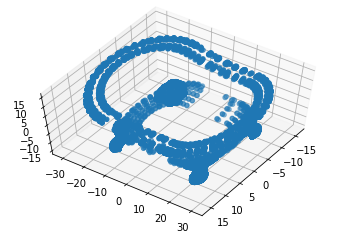

In [3]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.view_init(60, 35)


xdata = test_bathtub.iloc[:, 0]
ydata = test_bathtub.iloc[:, 1]
zdata = test_bathtub.iloc[:, 2]

ax.scatter3D(xdata, ydata, zdata);

### make a list of number of points to make a histogram

In [4]:
# root_dir = './ModelNet40/'
root_dir = './ModelNet10/'

class_list =  os.listdir(root_dir)

num_points = []

for i in range(len(class_list)):

    train_files = glob.glob(root_dir + class_list[i] + '/train/*.off')
    for filename in train_files:
            data_set = pd.read_csv(filename, skiprows = [0,1],
                    header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
            data_set = data_set[data_set.isnull().any(axis = 1)]
            data_set = data_set.iloc[:, :-1]
            
            n_pointers = len(data_set)
            num_points.append(n_pointers)

for i in range(len(class_list)):
    test_files = glob.glob(root_dir + class_list[i] + '/test/*.off')
    print(class_list[i])
    
    for filename in test_files:
            data_set = pd.read_csv(filename, skiprows = [0,1],
                    header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
            data_set = data_set[data_set.isnull().any(axis = 1)]
            data_set = data_set.iloc[:, :-1]
            
            
            n_pointers = len(data_set)
            num_points.append(n_pointers)
            

bathtub
bed
chair
desk
dresser
monitor
night_stand
sofa
table
toilet


In [5]:
num_points_np= np.array(num_points)

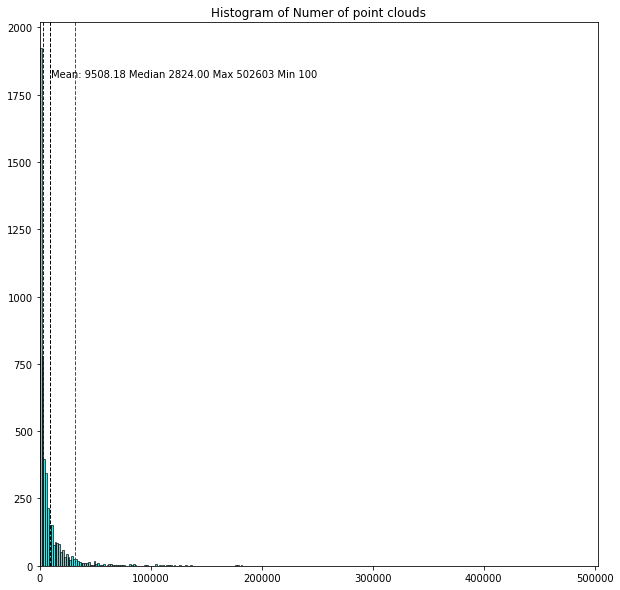

In [7]:
plt.figure(figsize=(10,10))
result = plt.hist(num_points_np, bins=300, color='c', edgecolor='k', alpha=0.65)
plt.axvline(num_points_np.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.median(num_points_np), color='b', linestyle='dashed', linewidth=1)


plt.axvline(np.mean(num_points_np) + np.std(num_points_np), color='r', linestyle='dashed', linewidth=1)

_, max_ = plt.ylim()
plt.xlim([0, max(num_points_np)])
plt.title("Histogram of Numer of point clouds")
plt.text(num_points_np.mean() + num_points_np.mean()/10, 
         max_ - max_/10, 
         'Mean: {:.2f} Median {:.2f} Max {} Min {}'.format(num_points_np.mean(), np.median(num_points_np),
                                             np.max(num_points_np), np.min(num_points_np)))

plt.show()


### even the distribution is long tail, the median value(2824) is lower than mean(9508.18). So I took std away from mean to define my longest number of point clouds

## check it out what is the outliers

In [8]:
max_num = int(np.mean(num_points_np) + 1 * np.std(num_points_np))

In [9]:
class_list

['bathtub',
 'bed',
 'chair',
 'desk',
 'dresser',
 'monitor',
 'night_stand',
 'sofa',
 'table',
 'toilet']

In [10]:
# root_dir = './ModelNet40/'
root_dir = './ModelNet10/'

class_list =  os.listdir(root_dir)

for i in range(len(class_list)):

    train_files = glob.glob(root_dir + class_list[i] + '/train/*.off')
    n = 0
    for filename in train_files:
            data_set = pd.read_csv(filename, skiprows = [0,1],
                    header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
            data_set = data_set[data_set.isnull().any(axis = 1)]
            data_set = data_set.iloc[:, :-1]
            
            n_pointers = len(data_set)
            
            
            if n_pointers > max_num:
                n += 1
    print("{} {} {:.2f}%".format(class_list[i], n , (n*100) / len(train_files)))


bathtub 4 3.77%
bed 43 8.35%
chair 97 10.91%
desk 13 6.50%
dresser 16 8.00%
monitor 7 1.51%
night_stand 3 1.50%
sofa 53 7.79%
table 16 4.08%
toilet 11 3.20%


In [13]:
import pandas as pd
import numpy as np

import io, os, sys
import glob

class data_clean():
    
    """
    centered the point clouds and make a total train/test set
    """
    def __init__(self, root_dir):
        """
        Args:
            root_dir (string): Directory with the ModelNet.
            max_num (int): largest number of point clouds 

        """
        self.root_dir = root_dir
#         self.max_num = max_num
        
        
        

    def find_max_num(self):
        
        global max_num
        
        num_points = []
#         class_list =  sorted(os.listdir(self.root_dir))


        for i in range(len(class_list)):

            train_files = sorted(glob.glob(self.root_dir + class_list[i] + '/train/*.off'))
            print("findin_max_num in train ", class_list[i])
            
            for filename in train_files:
                    data_set = pd.read_csv(filename, skiprows = [0,1],
                            header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
                    data_set = data_set[data_set.isnull().any(axis = 1)]
                    data_set = data_set.iloc[:, :-1]
                    

                    n_pointers = len(data_set)
                    num_points.append(n_pointers)

        for i in range(len(class_list)):
            
            test_files = sorted(glob.glob(self.root_dir + class_list[i] + '/test/*.off'))
            
            print("findin_max_num in test ", class_list[i])

            for filename in test_files:
                    data_set = pd.read_csv(filename, skiprows = [0,1],
                            header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
                    data_set = data_set[data_set.isnull().any(axis = 1)]
                    data_set = data_set.iloc[:, :-1]
                    
                    n_pointers = len(data_set)
                    num_points.append(n_pointers)
       
    
        num_points_np = np.array(num_points)        
        max_num = int(np.mean(num_points_np) + 2 * np.std(num_points_np))

        
        return max_num
        
        

    def centered_point_clouds(self, files):

        train_set = np.array([])
                
        for filename in files:
            data_set = pd.read_csv(filename, skiprows = [0,1],
                    header = None, names = ['x', 'y', 'z', 'c'], sep = " ")
            data_set = data_set[data_set.isnull().any(axis = 1)]
            data_set = data_set.iloc[:, :-1]
            data_set['class'] = i
            data_set = data_set.to_numpy() 

            max_min = (np.abs(np.max(data_set, axis = 0)) - np.abs(np.min(data_set, axis = 0))) / 2


            Canonical_ST = np.zeros([1,4])

            Canonical_ST[0,0] = max_min[0]
            Canonical_ST[0,1] = max_min[1]
            Canonical_ST[0,2] = max_min[2]

            centered_point_clouds = data_set - Canonical_ST
            
            df_repeated = pd.DataFrame(centered_point_clouds)
            
          
            centered_point_clouds = self.match_up(df_repeated)
            
            
            if len(centered_point_clouds) != max_num:
                print(len(centered_point_clouds))
            
            train_set = np.append(train_set, centered_point_clouds)
            
        train_set = train_set.reshape(-1, max_num, 4)
        
        
        return train_set
    
    
    def match_up(self, centered_point_clouds_df):
                
        while len(centered_point_clouds_df) < max_num:
            
            centered_point_clouds_df = pd.concat([centered_point_clouds_df] * 50, ignore_index=True)
            
        
        centered_point_clouds = centered_point_clouds_df.iloc[:max_num, :].to_numpy()
        
        return centered_point_clouds
    
    
    
    def total_set(self):
        
        global class_list
        global i 

        total_train_set = np.array([])
        total_test_set = np.array([])
        
        class_list =  sorted(os.listdir(self.root_dir))


#         class_list = os.listdir(self.root_dir) # to find how many classes are, of course 40.....
        max_num  = self.find_max_num()


        for i in range(len(class_list)):
            
            print("working on class: ",  class_list[i])
            train_files = glob.glob(self.root_dir + class_list[i] + '/train/*.off')
            test_files = glob.glob(self.root_dir + class_list[i] + '/test/*.off')
            

            train = self.centered_point_clouds(train_files)
            test = self.centered_point_clouds(test_files)
            
            total_train_set = np.append(total_train_set, train)    
            total_test_set = np.append(total_test_set, test)
            
               
        total_train_set = total_train_set.reshape(-1, max_num, 4)
        
        total_test_set = total_test_set.reshape(-1, max_num, 4)
        
        return total_train_set, total_test_set

In [14]:
if __name__ == "__main__":
    data = data_clean('./ModelNet10/')
    total_train_set, total_test_set = data.total_set()

findin_max_num in train  bathtub
findin_max_num in train  bed
findin_max_num in train  chair
findin_max_num in train  desk
findin_max_num in train  dresser
findin_max_num in train  monitor
findin_max_num in train  night_stand
findin_max_num in train  sofa
findin_max_num in train  table
findin_max_num in train  toilet
findin_max_num in test  bathtub
findin_max_num in test  bed
findin_max_num in test  chair
findin_max_num in test  desk
findin_max_num in test  dresser
findin_max_num in test  monitor
findin_max_num in test  night_stand
findin_max_num in test  sofa
findin_max_num in test  table
findin_max_num in test  toilet
working on class:  bathtub
working on class:  bed
working on class:  chair
working on class:  desk
working on class:  dresser
working on class:  monitor
working on class:  night_stand
working on class:  sofa
working on class:  table
working on class:  toilet


In [16]:
total_test_set.shape

(908, 54958, 4)

In [17]:
np.save('total_train_set.npy', total_train_set)
np.save('total_test_set.npy', total_test_set)